# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [282]:
import pandas as pd   
from IPython.display import display
import matplotlib.pyplot as plt  
import numpy as np 
import seaborn as sns
from scipy import stats as st
import math as mt

## Cargar datos

In [2]:
users = pd.read_csv('/datasets/megaline_users.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

In [3]:
# creamos un diccionario para verificar todas las tablas de los datasets
df_dic = {
    "users": users, 
    "calls":calls,
    "messages":messages,
    "internet":internet,
    "plans":plans,
}

In [4]:
for df_name, df in df_dic.items():
    print(df_name)
    display(df.head())

users


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


calls


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


messages


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


internet


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


'Conclusión,
 importamos librerias de pandas para crear graficas. Leer el conjunto de datos utilizadno pd.read_csv()
 Verificamos la información para cada DataFrame utilizando head()
 
 Los encabezados de las tablas estan de acuerdo al buen estilo 
 - Todos los caracteres en minúsculas
 - Sin espacios los nombres de las columnas
 - Se utilizan snake_case para el uso de varias palabras. 

## Preparar los datos

'Plan de solución, utilizamos metodo info para ver todos los dataframes
1. Verifica y corrige los tipos de datos con dtype() 
2. Identifica y completa valores ausentes con isna() sum()
3. Identifica y elimina los valores duplicados duplicated()  

## Tarifas

In [5]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [6]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [7]:
plans.dtypes

messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object

In [8]:
# Buscar y contar valores ausentes 
plans.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [9]:
# Buscar duplicados y contar
plans.duplicated().sum()

0

In [10]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
plans[plans['messages_included'].duplicated()].sum() # buscar duplicado por columna

messages_included        0.0
mb_per_month_included    0.0
minutes_included         0.0
usd_monthly_pay          0.0
usd_per_gb               0.0
usd_per_message          0.0
usd_per_minute           0.0
plan_name                0.0
dtype: float64

No encontramos valores ausentes. No encontramos valores duplicados.

## Corregir datos

In [11]:
# cambiar el nombre de la columna 'mb_per_month_included' a 'gb_per_month_included'
plans.rename(columns={'mb_per_month_included':'gb_per_month_included'}, inplace=True)
plans.head()

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [12]:
# Cambiamos los datos de la columna 'gb_per_month_included' de megabytes a gigabytes para esto dividimos por 1024
plans["gb_per_month_included"] = np.ceil(plans["gb_per_month_included"] / 1024)
plans.head()

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Usuarios/as

## Enriquecer los datos

In [13]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [14]:
# Buscar duplicados y contar
users.duplicated().sum()

0

In [15]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
users[users['user_id'].duplicated()].sum() # buscar duplicado por columna order_id

user_id       0.0
first_name    0.0
last_name     0.0
age           0.0
city          0.0
reg_date      0.0
plan          0.0
churn_date    0.0
dtype: float64

'Observamos 
'Encontramos 466 datos nulos en la columna 'churn_date' que corresponden a clientes que NO han cancelado la suscripción del servicio', no debemos reemplazar estos datos. 
 No se observan datos duplicados.
 La columna 'reg_date' tiene un valor del tipo fecha que se debe cambiar a datatime
 
 Plan de solución 
 Utilizamos metodo datetime para cambiar el tipo.

### Corregir los datos

In [16]:
# cambiar el nombre de la columna plan a plan_name
users.rename(columns={'plan':'plan_name'}, inplace=True)
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [17]:
#  utilizamos metodo datetime para cambiar el tipo de dato a fecha
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%dT')

In [18]:
users.dtypes

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan_name             object
churn_date            object
dtype: object

### Enriquecer los datos

In [19]:
# Proporción de usuarios que no han cancelado la suscripción
users["churn_date"].notna().mean()
# La proporción del 0.068 % que NO a cancelado la suscripción

0.068

In [20]:
# Creamos una nueva columna 'month'
users["month"] = users["reg_date"].dt.to_period("M").dt.start_time
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,2018-12-01
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,2018-08-01
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,2018-10-01
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,2018-01-01
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,2018-05-01


In [21]:
# Muestra cuantos clientes se estan registrando por mes
users.groupby("month")["user_id"].count()

month
2018-01-01    49
2018-02-01    42
2018-03-01    40
2018-04-01    45
2018-05-01    38
2018-06-01    54
2018-07-01    36
2018-08-01    47
2018-09-01    32
2018-10-01    42
2018-11-01    38
2018-12-01    37
Name: user_id, dtype: int64

<AxesSubplot:xlabel='month'>

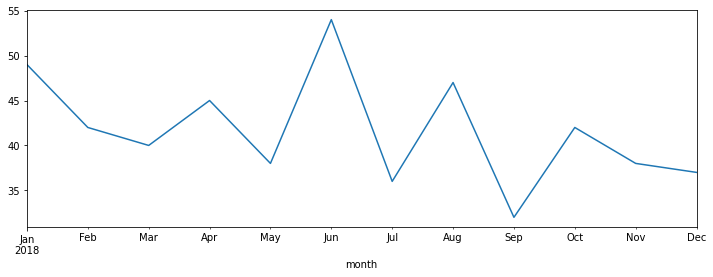

In [22]:
# Muestra la distribución de usuarios cada mes
users.groupby("month")["user_id"].count().plot(kind="line", figsize=(12,4))

## Llamadas

In [103]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  int64         
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 5.3 MB


,id,user_id,call_date,duration,month
0,100093,1000,2018-12-27,9.0,2018-12-01
1,1000145,1000,2018-12-27,14.0,2018-12-01
2,1000247,1000,2018-12-27,15.0,2018-12-01
3,1000309,1000,2018-12-28,6.0,2018-12-01
4,1000380,1000,2018-12-30,5.0,2018-12-01


In [126]:
calls.duplicated().sum()

0

'Observamos
 La columna 'duration' debe ser un tipo de dato entero 'int' ya que se redondea de segundos a minutos
 La columna 'call_date' debe ser un tipo de dato datetime ya que contiene datos del tipo fecha

### Corregir los datos

In [279]:
# Metodo to_datetime para que la columna 'call_date' se conviertan a un valor datetime
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%dT')

In [37]:
calls['id'] = calls['id'] .astype('int')
#calls['duration'] = calls['duration'] .astype('int')

In [38]:
# Verificamos los tipos de datos 
calls.dtypes

id                    int64
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object

In [39]:
# Cambiamos los datos de la columna 'duration' de segundos redondeados a minutos utilizamos Np.Ceil
calls['duration'] = np.ceil(calls['duration'])

### Enriquecer los datos

In [40]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

# Creamos una nueva columna 'month'
calls["month"] = calls["call_date"].dt.to_period("M").dt.start_time

<AxesSubplot:xlabel='month'>

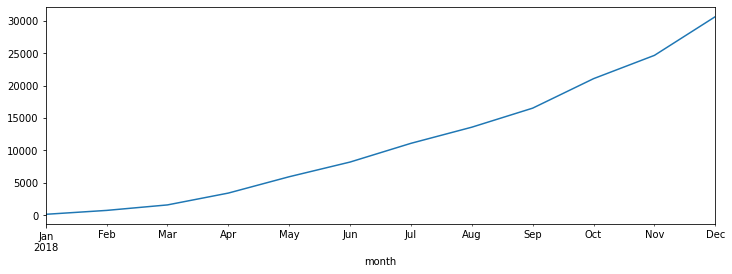

In [41]:
# Muestra la distribución de llamadas cada mes
calls.groupby("month")["user_id"].count().plot(kind="line", figsize=(12,4))

#### CONCLUSIÓN

  Cambiamos el tipo de valores de fechas a datatime en la columna de 'call_date'
  creamos una nueva columna "call_month" que almacena las llamadas en meses
  consideramos que cualquier valor diferente de 0  en esta columna debe ser cobrado.
  Los usuarios registran un alza de llamadas  en el mes de diciembre. 

La duración de una llamada con valor 0 significaria que no se realizaron llamadas.

## Mensajes

In [42]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [43]:
# Imprime una muestra de datos para los mensajes
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [44]:
messages.duplicated().sum()

0

'Observaciones
 La columna 'message_date debe ser un tipo de dato datetime ya que contiene datos del tipo fecha

### Corregir los datos

In [45]:
# Metodo to_datetime para que la columna 'message_date' se conviertan a un valor datetime
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%dT')

In [46]:
messages['id'] = messages['message_date'].astype('int')

In [47]:
# Verificamos los tipos de datos 
messages.dtypes

id                       int64
user_id                  int64
message_date    datetime64[ns]
dtype: object

### Enriquecer los datos

In [48]:
# Creamos una nueva columna 'month'
messages["month"] = messages["message_date"].dt.to_period("M").dt.start_time

In [49]:
# Muestra cantidad de mensajes de cada usuario por mes
messages.groupby("month")["user_id"].count()

month
2018-01-01       83
2018-02-01      259
2018-03-01      594
2018-04-01     1333
2018-05-01     2780
2018-06-01     3833
2018-07-01     5208
2018-08-01     7394
2018-09-01     9227
2018-10-01    12201
2018-11-01    14068
2018-12-01    19071
Name: user_id, dtype: int64

<AxesSubplot:xlabel='month'>

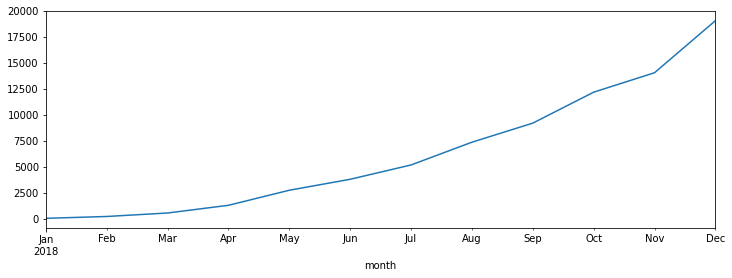

In [50]:
# Muestra la distribución de internet cada mes
messages.groupby("month")["user_id"].count().plot(kind="line", figsize=(12,4))

Conclusión, podemos ver que los datos van en una tendencia al alza en el uso de mensajes, el mes con mas mensajes enviados es diciembre. 

## Internet

In [51]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [52]:
# Imprime una muestra de datos para el tráfico de internet
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [53]:
internet.duplicated().sum()

0

'Observaciones
 La columna 'session_date' debe ser un tipo de dato datetime ya que contiene datos de fecha
 La columna mb_used debe ser un tipo de dato entero ya que contiene el valor en megabytes que debemos cambiar a gigabytes
 Las sesiones individuales no se redondean. En vez de esto el total del mes se redondea hacia arriba de megabytes a gigabytes.

### Corregir los datos

In [54]:
# Metodo to_datetime para que la columna 'sesion_date' se conviertan a un valor datetime
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%dT')

In [284]:
internet['id'] = internet['id'].astype('int')

In [56]:
# cambiar el nombre de la columna 'mb_per_month_included' a 'gb_per_month_included'
internet.rename(columns={'mb_used':'gb_used'}, inplace=True)
internet.head()

,id,user_id,session_date,gb_used
0,100013,1000,2018-12-29,89.86
1,1000204,1000,2018-12-31,0.00
2,1000379,1000,2018-12-28,660.40
3,1000413,1000,2018-12-26,270.99
4,1000442,1000,2018-12-27,880.22


In [59]:
# Verificamos los tipos de datos 
internet.dtypes

id                       int64
user_id                  int64
session_date    datetime64[ns]
gb_used                float64
dtype: object

### Enriquecer los datos

In [60]:
# Creamos una nueva columna 'month'
internet["month"] = internet["session_date"].dt.to_period("M").dt.start_time
internet.head()

,id,user_id,session_date,gb_used,month
0,100013,1000,2018-12-29,89.86,2018-12-01
1,1000204,1000,2018-12-31,0.00,2018-12-01
2,1000379,1000,2018-12-28,660.40,2018-12-01
3,1000413,1000,2018-12-26,270.99,2018-12-01
4,1000442,1000,2018-12-27,880.22,2018-12-01


<AxesSubplot:xlabel='month'>

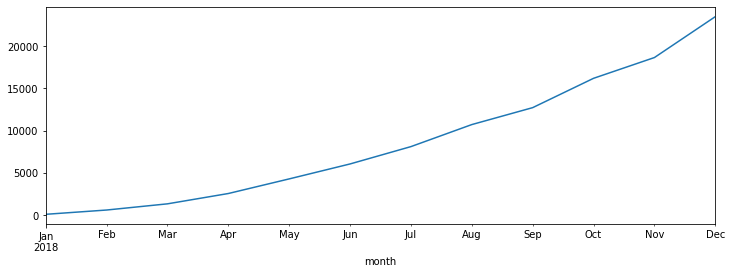

In [61]:
# Muestra la distribución de internet cada mes
internet.groupby("month")["user_id"].count().plot(kind="line", figsize=(12,4))

Conclusión en diciembre es el mes que mas datos de internet consumen los usuarios. 

## Estudiar las condiciones de las tarifas

In [62]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans.head()

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


Conclusiones 
Dependiendo el tipo de usuario es que le va a convenir utilizar un tipo de tarifa u otro. 
Si tiene un plan surf de 20 usd y constantemente sobre pasa la tarifa seria conveniente tomar el plan ultimate
Si tiene un plan ultimate de 70 usd y durante el mes se registra que no lo utiliza al maximo le convendria cambiarse a un plan mas economico.

## Agregar datos por usuario

In [63]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

# Agrupamos las columnas para obtener el total de llamadas por mes para cada usuario 
monthly_calls_per_user = ( 
    calls
    .groupby(["user_id", "month"])["id"]
    .count()
    .reset_index()
    .rename(columns={"id": "n_calls"})
)

In [64]:
# Muestra la cantidad de llamadas por cada usuario 
monthly_calls_per_user.head()

,user_id,month,n_calls
0,1000,2018-12-01,16
1,1001,2018-08-01,27
2,1001,2018-09-01,49
3,1001,2018-10-01,65
4,1001,2018-11-01,64


Conclusiones, en la columna n_call muestra la cantidad de llamadas realizadas por cada usuario en el mes. 

<AxesSubplot:>

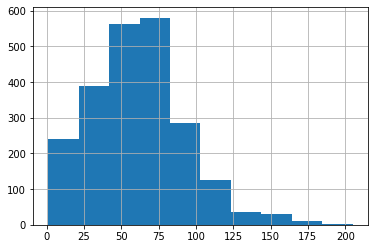

In [65]:
# Distribución de llamadas al mes 
monthly_calls_per_user["n_calls"].hist()

'Conclusión, el histograma muestra que la mayoria de los usuarios realiza entre 22 y 80 llamadas al mes

In [66]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
calls.groupby("month")["duration"].sum() 

month
2018-01-01      1180.0
2018-02-01      5495.0
2018-03-01     11241.0
2018-04-01     24651.0
2018-05-01     42549.0
2018-06-01     59271.0
2018-07-01     79645.0
2018-08-01     96360.0
2018-09-01    117986.0
2018-10-01    149624.0
2018-11-01    176341.0
2018-12-01    220004.0
Name: duration, dtype: float64

In [67]:
calls.head()

,id,user_id,call_date,duration,month
0,100093,1000,2018-12-27,9.0,2018-12-01
1,1000145,1000,2018-12-27,14.0,2018-12-01
2,1000247,1000,2018-12-27,15.0,2018-12-01
3,1000309,1000,2018-12-28,6.0,2018-12-01
4,1000380,1000,2018-12-30,5.0,2018-12-01


In [68]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

# Agrupamos las columnas para obtener el total de minutos usados por mes para cada usuario 
monthly_duration_per_user = ( 
    calls
    .groupby(["user_id", "month"])["duration"]
    .sum()
    .reset_index()
    .rename(columns={"id": "monthly_duration"})
)

In [69]:
# Muestra el total de minutos usados por cada usuario cada mes. 
monthly_duration_per_user.head()

,user_id,month,duration
0,1000,2018-12-01,124.0
1,1001,2018-08-01,182.0
2,1001,2018-09-01,315.0
3,1001,2018-10-01,393.0
4,1001,2018-11-01,426.0


<AxesSubplot:>

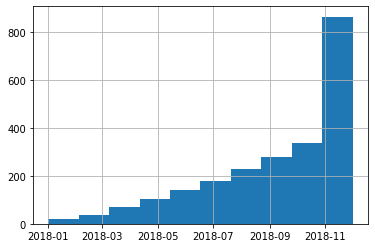

In [70]:
# Distribución de minutos usados por cada usuario al mes 
monthly_duration_per_user["month"].hist()

'Conclusión, el histograma muestra que la mayoria de los usuarios realiza llamadas en el mes de noviembre.

In [71]:
# muestra la suma de mensajes enviados por cada usuario al mes.
messages.groupby("month")["user_id"].sum() 

month
2018-01-01       98387
2018-02-01      316811
2018-03-01      725505
2018-04-01     1648919
2018-05-01     3457204
2018-06-01     4802628
2018-07-01     6496071
2018-08-01     9181518
2018-09-01    11501173
2018-10-01    15223683
2018-11-01    17576988
2018-12-01    23728588
Name: user_id, dtype: int64

In [72]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
monthly_messages_user = ( 
    messages
    .groupby(["user_id", "month"])["id"]
    .count()
    .reset_index()
    .rename(columns={"id": "count_sms"})
)

In [199]:
# Muestra el total de mensajes por usuario enviados al mes. 
monthly_messages_user.head()

,user_id,month,count_sms
0,1000,2018-12-01,11
1,1001,2018-08-01,30
2,1001,2018-09-01,44
3,1001,2018-10-01,53
4,1001,2018-11-01,36


In [74]:
# Muestra el minimo de mensajes y maximo de mensajes enviados por usuario al mes.
filtered_messages_min = monthly_messages_user.min()
filtered_messages_max = monthly_messages_user.max()

print(filtered_messages_min)
print(filtered_messages_max)

user_id                     1000
month        2018-01-01 00:00:00
count_sms                      1
dtype: object
user_id                     1497
month        2018-12-01 00:00:00
count_sms                    266
dtype: object


'CONCLUSIONES
El minimo de mensajes enviados por usuario es de 1000 y el maximo de mensajes enviados por mes es de 1497

In [228]:
internet.head()

,id,user_id,session_date,gb_used,month
0,100013,1000,2018-12-29,1.0,2018-12-01
1,1000204,1000,2018-12-31,0.0,2018-12-01
2,1000379,1000,2018-12-28,1.0,2018-12-01
3,1000413,1000,2018-12-26,1.0,2018-12-01
4,1000442,1000,2018-12-27,1.0,2018-12-01


In [224]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

monthly_gb_per_user = (
    internet
    .groupby(["user_id", "month"])["id"]
    .sum()
    .reset_index()
    .rename(columns= {"id": "gb_used"})
)

In [233]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

# Fusionamos tabla calls con los minutos usando las columnas 'user_id' y 'month'
merged_data = monthly_calls_per_user.merge(monthly_duration_per_user, on=['user_id', 'month'], how='outer')

# Fusionamos el resultado anterior con tabla messages usando las columnas 'user_id' y 'month'
merged_data = merged_data.merge(monthly_messages_user, on=['user_id', 'month'], how='outer')

# Fusionamos el resultado anterior con tabla internet usando las columnas 'user_id' y 'month'
merged_data = merged_data.merge(monthly_gb_per_user, on=['user_id', 'month'], how='outer')

merged_data.fillna(0, inplace=True)

# Cambiamos los datos de la columna 'gb_per_month_included' de megabytes a gigabytes para esto dividimos por 1024
merged_data["gb_used"] = np.ceil(merged_data["gb_used"] / 1024)


merged_data.info()
merged_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   user_id    2293 non-null   int64         
 1   month      2293 non-null   datetime64[ns]
 2   n_calls    2293 non-null   float64       
 3   duration   2293 non-null   float64       
 4   count_sms  2293 non-null   float64       
 5   gb_used    2293 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 125.4 KB


,user_id,month,n_calls,duration,count_sms,gb_used
0,1000,2018-12-01,16.0,124.0,11.0,1.0
1,1001,2018-08-01,27.0,182.0,30.0,1.0
2,1001,2018-09-01,49.0,315.0,44.0,1.0
3,1001,2018-10-01,65.0,393.0,53.0,1.0
4,1001,2018-11-01,64.0,426.0,36.0,1.0


In [234]:
# Añade la información de la tarifa
# utilizamos el dataframe merged_data 

merged_data =pd.merge(merged_data, users[['user_id', 'plan_name']], on= 'user_id', how= 'left')
merged_data =pd.merge(merged_data, plans, on='plan_name', how= 'left')

# Cambiamos los datos de la columna 'gb_per_month_included' de megabytes a gigabytes para esto dividimos por 1024
#internet["gb_used"] = np.ceil(internet["gb_used"] / 1024)

merged_data.info()
merged_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   int64         
 1   month                  2293 non-null   datetime64[ns]
 2   n_calls                2293 non-null   float64       
 3   duration               2293 non-null   float64       
 4   count_sms              2293 non-null   float64       
 5   gb_used                2293 non-null   float64       
 6   plan_name              2293 non-null   object        
 7   messages_included      2293 non-null   int64         
 8   gb_per_month_included  2293 non-null   float64       
 9   minutes_included       2293 non-null   int64         
 10  usd_monthly_pay        2293 non-null   int64         
 11  usd_per_gb             2293 non-null   int64         
 12  usd_per_message        2293 non-null   float64       
 13  usd

,user_id,month,n_calls,duration,count_sms,gb_used,plan_name,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,2018-12-01,16.0,124.0,11.0,1.0,ultimate,1000,30.0,3000,70,7,0.01,0.01
1,1001,2018-08-01,27.0,182.0,30.0,1.0,surf,50,15.0,500,20,10,0.03,0.03
2,1001,2018-09-01,49.0,315.0,44.0,1.0,surf,50,15.0,500,20,10,0.03,0.03
3,1001,2018-10-01,65.0,393.0,53.0,1.0,surf,50,15.0,500,20,10,0.03,0.03
4,1001,2018-11-01,64.0,426.0,36.0,1.0,surf,50,15.0,500,20,10,0.03,0.03


In [241]:
# Calcula el ingreso mensual para cada usuario

# Excess minutes
merged_data["excess_minutes"] = merged_data["duration"] - merged_data["minutes_included"]
merged_data["excess_minutes"] = merged_data["excess_minutes"].where(merged_data["excess_minutes"] > 0, 0)

In [242]:
# Excess messages
merged_data["excess_messages"] = merged_data["count_sms"] - merged_data["messages_included"]
merged_data["excess_messages"] = merged_data["excess_messages"].where(merged_data["excess_messages"] > 0, 0)

In [243]:
# Excess gb
merged_data["excess_gb"] = merged_data["gb_used"] - merged_data["gb_per_month_included"]
merged_data["excess_gb"] = merged_data["excess_gb"].where(merged_data["excess_gb"] > 0, 0)

In [244]:
# Calcular el income
merged_data["income"] = merged_data["usd_monthly_pay"] \
    + merged_data["excess_minutes"] * merged_data["usd_per_minute"] \
    + merged_data["excess_messages"] * merged_data["usd_per_message"] \
    + merged_data["excess_gb"] * merged_data["usd_per_gb"]

In [237]:
# Vemos el resultado
merged_data.info()
print()
merged_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   int64         
 1   month                  2293 non-null   datetime64[ns]
 2   n_calls                2293 non-null   float64       
 3   duration               2293 non-null   float64       
 4   count_sms              2293 non-null   float64       
 5   gb_used                2293 non-null   float64       
 6   plan_name              2293 non-null   object        
 7   messages_included      2293 non-null   int64         
 8   gb_per_month_included  2293 non-null   float64       
 9   minutes_included       2293 non-null   int64         
 10  usd_monthly_pay        2293 non-null   int64         
 11  usd_per_gb             2293 non-null   int64         
 12  usd_per_message        2293 non-null   float64       
 13  usd

,user_id,month,n_calls,duration,count_sms,gb_used,plan_name,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,excess_gb
0,1000,2018-12-01,16.0,124.0,11.0,1.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0
1,1001,2018-08-01,27.0,182.0,30.0,1.0,surf,50,15.0,500,20,10,0.03,0.03,0.0
2,1001,2018-09-01,49.0,315.0,44.0,1.0,surf,50,15.0,500,20,10,0.03,0.03,0.0
3,1001,2018-10-01,65.0,393.0,53.0,1.0,surf,50,15.0,500,20,10,0.03,0.03,0.0
4,1001,2018-11-01,64.0,426.0,36.0,1.0,surf,50,15.0,500,20,10,0.03,0.03,0.0


Se verifico el unso del cambio de megabytes a gigabytes en la columna gb_used 

Conclusión, la tabla merged_data es el resultado de todas las uniones de tablas y columnas que nos interesa utilizar para el estudio. 

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [84]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# crear tabla pivot
pivot_table = pd.pivot_table(merged_data, index=['plan_name', 'month'], values= 'duration', aggfunc= 'mean')

In [85]:
# Reiniciamos el indice y borramos de la tabla la hora
pivot_table.index = pivot_table.index.set_levels(pivot_table.index.levels[1].strftime('%Y-%m'), level=1)

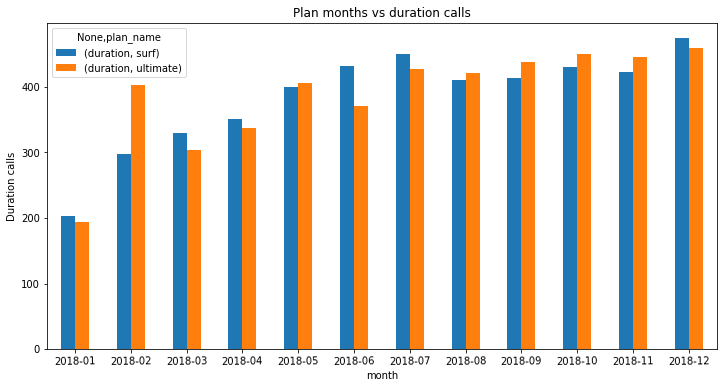

In [86]:
# Crear grafico de barras
pivot_table.unstack('plan_name').plot(kind='bar', 
                                      figsize= (12,6),
                                      ylabel= 'Duration calls',
                                      title='Plan months vs duration calls',
                                      legend= 'Plan month',
                                      rot= 1)
plt.show()

In [87]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Filtrar las tablas por cada plan 
surf_duration = merged_data[merged_data['plan_name'] == 'surf']['duration']
ultimate_duration = merged_data[merged_data['plan_name'] == 'ultimate']['duration']

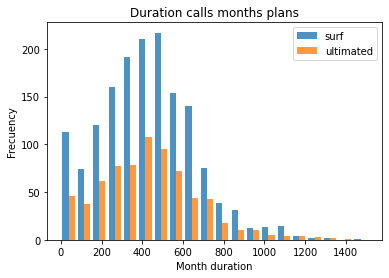

In [88]:
# Mostrar el histograma hist()
plt.hist([surf_duration, ultimate_duration], bins=20, alpha=0.8, label= ['Surf', 'Ultimate'])

# Argumentos
plt.xlabel('Month duration')
plt.ylabel('Frecuency')
plt.title('Duration calls months plans')
plt.legend(['surf', 'ultimated'])

# Mostrar la distribución
plt.show()

In [89]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Agrupamos los datos por mes
data_month = merged_data.groupby('month')

# Calcula la media y la varianza de la duración mensual de llamadas de cada mes
mean_duration_calls = merged_data.groupby('month')['duration'].mean()
variance_duration_calls = merged_data.groupby('month')['duration'].var()

# Imprimir el resultado 
print(mean_duration_calls)
print()
print(variance_duration_calls)

month
2018-01-01    196.666667
2018-02-01    343.437500
2018-03-01    321.171429
2018-04-01    347.197183
2018-05-01    401.405660
2018-06-01    411.604167
2018-07-01    442.472222
2018-08-01    413.562232
2018-09-01    421.378571
2018-10-01    436.221574
2018-11-01    430.100000
2018-12-01    469.091684
Name: duration, dtype: float64

month
2018-01-01    13135.866667
2018-02-01    61567.329167
2018-03-01    43378.499160
2018-04-01    45620.531992
2018-05-01    54950.510063
2018-06-01    45086.240822
2018-07-01    64525.781347
2018-08-01    53926.747188
2018-09-01    49735.899181
2018-10-01    52829.190527
2018-11-01    54351.738142
2018-12-01    63180.258670
Name: duration, dtype: float64


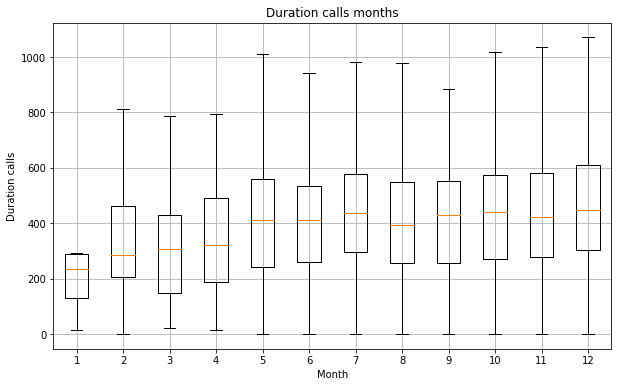

In [90]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
# Filtramos los datos por mes y duración de las llamadas
month_duration = merged_data[['month', 'duration']]

# Diagrama de caja 
plt.figure(figsize=(10,6))
plt.boxplot(month_duration.groupby('month')['duration'].apply(list).values, showfliers=False)


# Argumentos 
plt.title('Duration calls months')

plt.xlabel('Month')
plt.ylabel('Duration calls')
plt.xticks(range(1, 13), [str(month) for month in range (1, 13)])

# Mostrar Diagrama de caja 
plt.grid(True)
plt.show()

En el diagrama de caja y bigotes podemos ver el valor minimo y maximo asi tambie su valor medio 
En Enero podemos ver que su valor minimo es 1 su valor maximo 300 y el valor medio seria 250

### Mensajes

In [91]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Filtrar las tablas por cada plan 
surf_count_sms = merged_data[merged_data['plan_name'] == 'surf']['count_sms']
ultimate_count_sms = merged_data[merged_data['plan_name'] == 'ultimate']['count_sms']

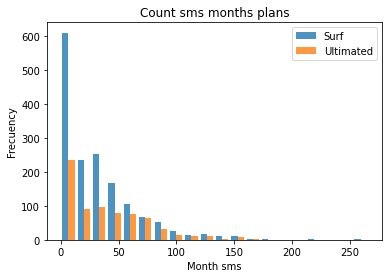

In [92]:
# Mostrar el histograma hist()
plt.hist([surf_count_sms, ultimate_count_sms], bins=20, alpha=0.8, label= ['Surf', 'Ultimate'])

# Argumentos
plt.xlabel('Month sms')
plt.ylabel('Frecuency')
plt.title('Count sms months plans')
plt.legend(['Surf', 'Ultimated'])

# Mostrar la distribución
plt.show()

La cantidad de mensajes es mas alta en el plan surf y el comportamiento es mayor en ambos planes al iniciar el plan.

### Internet

In [93]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
surf_gb_used = merged_data[merged_data['plan_name'] == 'surf']['gb_used']
ultimate_gb_used = merged_data[merged_data['plan_name'] == 'ultimate']['gb_used']

In [94]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   int64         
 1   month                  2293 non-null   datetime64[ns]
 2   n_calls                2293 non-null   float64       
 3   duration               2293 non-null   float64       
 4   count_sms              2293 non-null   float64       
 5   gb_used                2293 non-null   float64       
 6   plan_name              2293 non-null   object        
 7   messages_included      2293 non-null   int64         
 8   gb_per_month_included  2293 non-null   float64       
 9   minutes_included       2293 non-null   int64         
 10  usd_monthly_pay        2293 non-null   int64         
 11  usd_per_gb             2293 non-null   int64         
 12  usd_per_message        2293 non-null   float64       
 13  usd

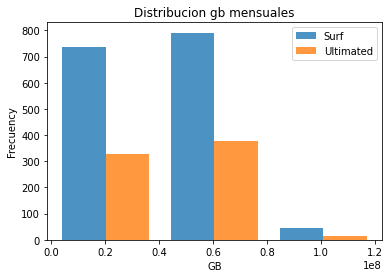

In [95]:
# Mostrar el histograma hist()
plt.hist([surf_gb_used, ultimate_gb_used], bins=3, alpha=0.8, label= ['Surf', 'Ultimate'])

# Argumentos
plt.xlabel('GB')
plt.ylabel('Frecuency')
plt.title('Distribucion gb mensuales')
plt.legend(['Surf', 'Ultimated'])

# Mostrar la distribución
plt.show()

El comportamiento de los usuarios en el plan surf es mas alto que en ultimated el promedio es entre 0.75 y 1 gb

## Ingreso

In [246]:
# Calculamos las llamadas en la tabla calls
monthly_duration_per_user = ( 
    calls
    .groupby(["user_id", "month"])["duration"]
    .sum()
    .reset_index()
    .rename(columns={"id": "monthly_duration"})
)

# Calculamos los mensajes en la tabla messages
sms_monthly_per_user = ( 
    messages
    .groupby(["user_id", "month"])["id"] 
    .count()
    .reset_index()
    .rename(columns={"id": "sms_monthly"})
)

# Calculamos el uso de gb en la tabla internet

internet_monthly_per_user = ( 
    internet
    .groupby(["user_id", "month"])["gb_used"] 
    .sum()
    .reset_index()
    .rename(columns={"gb_used": "internet_monthly"})
)

# Calculamos el income para cada usuario mensual
income_data_with_plan_info = (
    users[["user_id", "plan_name", "city"]]
    .merge(plans, on="plan_name")
    .merge(monthly_duration_per_user, how="outer", on="user_id")
    .merge(sms_monthly_per_user, how="outer", on=["user_id", "month"])
    .merge(internet_monthly_per_user, how="outer", on=["user_id", "month"])
)


# Calculamos el exceso de minutos para cada usuario mensual en llamadas
income_data_with_plan_info["excess_minutes"] = income_data_with_plan_info["duration"] - income_data_with_plan_info["minutes_included"]

income_data_with_plan_info["excess_minutes"] = income_data_with_plan_info["excess_minutes"].where(
    income_data_with_plan_info["excess_minutes"] > 0,
    0
)

# Calculamos el exceso de mensajes para cada usuario mensual 
income_data_with_plan_info["excess_messages"] = income_data_with_plan_info["sms_monthly"] - income_data_with_plan_info["messages_included"]

income_data_with_plan_info["excess_messages"] = income_data_with_plan_info["excess_messages"].where(
    income_data_with_plan_info["excess_messages"] > 0,
    0
)

# Calculamos el exceso de gb para cada usuario mensual
income_data_with_plan_info["excess_gb"] = income_data_with_plan_info["internet_monthly"] - income_data_with_plan_info["gb_per_month_included"]

income_data_with_plan_info["excess_gb"] = income_data_with_plan_info["excess_gb"].where(
    income_data_with_plan_info["excess_gb"] > 0,
    0
)


# Calculamos el income para cada usuario mensual
income_data_with_plan_info["income"] = income_data_with_plan_info["usd_monthly_pay"]  \
    + income_data_with_plan_info["excess_minutes"] * income_data_with_plan_info["usd_per_minute"] \
    + income_data_with_plan_info["excess_messages"] * income_data_with_plan_info["usd_per_message"] \
    + income_data_with_plan_info["excess_gb"] * income_data_with_plan_info["usd_per_gb"] 

# Mostramos el resultado
income_data_with_plan_info.head()

,user_id,plan_name,city,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,month,duration,sms_monthly,internet_monthly,excess_minutes,excess_messages,excess_gb,income
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000.0,30.0,3000.0,70.0,7.0,0.01,0.01,2018-12-01,124.0,11.0,4.0,0.0,0.0,0.0,70.0
1,1006,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000.0,30.0,3000.0,70.0,7.0,0.01,0.01,2018-11-01,10.0,15.0,7.0,0.0,0.0,0.0,70.0
2,1006,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000.0,30.0,3000.0,70.0,7.0,0.01,0.01,2018-12-01,59.0,139.0,60.0,0.0,0.0,30.0,280.0
3,1008,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000.0,30.0,3000.0,70.0,7.0,0.01,0.01,2018-10-01,476.0,21.0,48.0,0.0,0.0,18.0,196.0
4,1008,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000.0,30.0,3000.0,70.0,7.0,0.01,0.01,2018-11-01,446.0,37.0,55.0,0.0,0.0,25.0,245.0


In [98]:
# Analizamos los usuarios que excedieron el plan contratado
income_data_with_plan_info.query("(income != 70) and (income != 20)").head()

,user_id,plan_name,city,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,month,duration,sms_monthly,internet_monthly,excess_minutes,excess_messages,excess_gb,income
2,1006,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000.0,30.0,3000.0,70.0,7.0,0.01,0.01,2018-12-01,59.0,139.0,62.0,0.0,0.0,32.0,294.0
3,1008,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000.0,30.0,3000.0,70.0,7.0,0.01,0.01,2018-10-01,476.0,21.0,48.0,0.0,0.0,18.0,196.0
4,1008,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000.0,30.0,3000.0,70.0,7.0,0.01,0.01,2018-11-01,446.0,37.0,56.0,0.0,0.0,26.0,252.0
5,1008,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000.0,30.0,3000.0,70.0,7.0,0.01,0.01,2018-12-01,634.0,26.0,40.0,0.0,0.0,10.0,140.0
7,1011,ultimate,"Cleveland-Elyria, OH MSA",1000.0,30.0,3000.0,70.0,7.0,0.01,0.01,2018-07-01,499.0,53.0,58.0,0.0,0.0,28.0,266.0


## Prueba las hipótesis estadísticas

In [281]:
# Prueba las hipótesis
from scipy.stats import ttest_ind

alpha = 0.5 

stat, p_value = ttest_ind(
    income_data_with_plan_info.query("plan_name == 'surf'")["income"],
    income_data_with_plan_info.query("plan_name == 'ultimate'")["income"],
    equal_var = False
)

# Rechaza la hipotesis solo si la media muestral es significativamente menor que el valor alpha
print('valor p:', stat, p_value)

if (stat, p_value < alpha):  
    print('Rechazamos la hipótesis nula')
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 22.203395422068702 7.0851747203633435e-99
Rechazamos la hipótesis nula


Añadimos equal_var = False
Rechazamos la hipotesis nula ya que el valor es mas pequeño que el valor alpha 

In [273]:
# calculamos el promedio para ambos planes, esperamos que los promedios sean mas cercanos

print(f"""
{income_data_with_plan_info.query("plan_name == 'surf'")["income"].mean()}
{income_data_with_plan_info.query("plan_name == 'ultimate'")["income"].mean()}
""")



273.80225930680365
161.06815020862308



In [277]:
# Prueba las hipótesis para los usuarios de NY-NJ
from scipy.stats import ttest_ind

alpha = 0.5 

stat, p_value = ttest_ind(
    income_data_with_plan_info.query("city == 'New York-Newark-Jersey City, NY-NJ-PA MSA'")["income"].fillna(0),
    income_data_with_plan_info.query("city != 'New York-Newark-Jersey City, NY-NJ-PA MSA'")["income"].fillna(0)
)

# Rechaza la hipotesis solo si la media muestral es significativamente menor que el valor alpha
print('valor p:', stat, p_value)

if (stat, p_value < alpha):  
    print('Rechazamos la hipótesis nula')
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 3.090141820733481 0.002024451761021351
Rechazamos la hipótesis nula


In [276]:
# Prueba las hipótesis

# calculamos todos los usuarios del area NY y todos los que son diferentes de esa area
print(f"""
{income_data_with_plan_info.query("city == 'New York-Newark-Jersey City, NY-NJ-PA MSA'")["income"].mean()} 
{income_data_with_plan_info.query("city != 'New York-Newark-Jersey City, NY-NJ-PA MSA'")["income"].mean()} 
""")



256.59069705093833 
234.60272584033615 



Se actualizaron los valores resultando 22 dolares de diferencia entre lo que pagan los de NY y los que no son de esa area.

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Evaluamos los datos de los usuarios, realizamos el analisis del mes para cada valor de llamadas, mensajes y gb utilizados para cada plan Surf y Ultimate, reconocemos que el plan esta diseñado para que los usuarios del plan Surf generen un pago extra para cada vez que se exceden en el uso de gb, seria una buena recomendación indicarle a los usuarios que constantemente mes a mes se estan excediendo contratar el plan Ultimate, pero entendemos que las ganancias extra de la compañia estan en que constantemente los usuarios se excedan. 

* Se verificaron la cantidad de datos encontrando el numero de valores 2293 
* El redondeo de las llamadas utlizamos metodo np.ceil, con la libreria de import math as mt se refiere a utilizar round
  
  Redondear a 2 dígitos decimales
  numero_redondeado = round(numero, 2)


* Se verifico la transformación de megabytes a gigabytes despues de la agrupación merge
* Se cambiaron los valores y se verificar la segunda prueba de hipótesis